# **Introduction**

Thirty years ago, UNDP created a new way to conceive and measure progress. Instead of using growth in GDP as the sole measure of development, they ranked the world’s countries by their human development: by whether people in each country have the freedom and opportunity to live the lives they value.

The HDI is calculated as the geometric mean (equally-weighted) of life expectancy, education, and GNI per capita, as follows: The education dimension is the arithmetic mean of the two education indices (mean years of schooling and expected years of schooling.

For this project, I want to better understand the countries who have seen significant increases in HDI over the past decade. I want to look into their contirbutors to success are and compare their similarities and differences. I am particularly interested in Sub-Saharan Africa, as it is the region of the world with the fastest growing economies. 

I will be using multiple data sets from the United Nations' Human Development Data Center. 

Link to original data sets: http://hdr.undp.org/en/data

# **First Part: Organizing The Data**

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

Import HDI data as well as each individual input of HDI (education index is the aggregate of the two education components).


In [314]:
#Human Development Index over time by country
HDI_read = pd.read_csv('Human Development Index.csv')
HDI = pd.DataFrame(HDI_read)
HDI.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,0.348,0.35,0.353,0.384,0.393,0.409,0.418,0.429,0.447,0.447,0.46,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,0.665,0.671,0.678,0.684,0.691,0.696,0.706,0.713,0.722,0.728,0.733,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,0.621,0.629,0.637,0.647,0.657,0.667,0.677,0.685,0.69,0.7,0.702,0.711,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,..,..,0.813,0.815,0.82,0.827,0.833,0.827,0.837,0.837,0.84,0.839,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,..,0.391,0.4,0.41,0.426,0.435,0.446,0.46,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [315]:
#Gross National Income per capita (PPP$) over time by country
GNI_read = pd.read_csv('Gross National Income.csv')
GNI = pd.DataFrame(GNI_read)
GNI.head()


,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,2478,2060,1922,1321,951,1344,1223,1130,1058,985,904,820,1291,1334,1312,1390,1479,1830,1672,1900,1917,2014,2165,2230,2214,2128,2135,2230,2217,2229
1,69,Albania,4938,3496,3208,3685,4103,4772,5253,4681,5115,5716,6139,6661,6923,7338,7750,8199,8830,9434,10019,10241,10775,11237,11365,11806,11951,12273,12753,13071,13637,13998
2,91,Algeria,8597,8206,8162,7830,7543,7567,7655,7652,7967,8025,8110,8469,8734,9253,9451,9692,9816,10385,10574,10539,10824,10793,10798,10828,11006,11151,11554,11372,11302,11174
3,36,Andorra,45393,44773,43488,41569,41401,41761,43357,47312,48965,50791,50582,51350,52559,56431,58307,60537,61623,60386,54424,52042,49262,47366,47347,48486,50568,51780,53245,54371,55254,56000
4,148,Angola,4823,5380,2064,2025,1550,3396,3357,3962,3885,3508,3674,3883,4638,4663,4907,5366,5646,6330,6461,6967,6913,6887,7282,7479,7704,7652,7189,6862,6361,6104


In [316]:
#Education Index over time by country (Calculated using Mean Years of Schooling and Expected Years of Schooling.)
EI_read = pd.read_csv('Education Index.csv')
EI = pd.DataFrame(EI_read)
EI.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.19,0.202,0.213,0.224,0.235,0.247,0.259,0.271,0.302,0.312,0.324,0.336,0.342,0.352,0.372,0.374,0.39,0.398,0.403,0.405,0.406,0.408,0.413,0.414
1,69,Albania,0.583,0.588,0.557,0.542,0.541,0.55,0.557,0.569,0.579,0.584,0.586,0.588,0.596,0.604,0.605,0.621,0.628,0.64,0.644,0.65,0.671,0.714,0.739,0.749,0.758,0.753,0.745,0.747,0.743,0.746
2,91,Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,0.487,0.5,0.513,0.529,0.542,0.557,0.57,0.577,0.588,0.588,0.608,0.626,0.644,0.639,0.639,0.652,0.659,0.66,0.665,0.668,0.672
3,36,Andorra,..,..,..,..,..,..,..,..,..,..,0.63,0.63,0.636,0.642,0.65,0.631,0.651,0.652,0.667,0.668,0.67,0.671,0.724,0.714,0.725,0.718,0.722,0.713,0.720,0.720
4,148,Angola,..,..,..,..,..,..,..,..,..,0.276,0.288,0.3,0.312,0.324,0.336,0.348,0.362,0.376,0.39,0.404,0.398,0.423,0.435,0.447,0.46,0.472,0.487,0.498,0.500,0.500


In [317]:
#Life Expectancy at Birth (Years) over time by country
LE_read = pd.read_csv('Life Expectancy at Birth.csv')
LE = pd.DataFrame(LE_read)
LE.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,50.3,51.0,51.6,52.3,52.8,53.4,53.9,54.4,54.9,55.4,55.8,56.3,56.8,57.3,57.8,58.3,58.8,59.4,59.9,60.5,61.0,61.6,62.1,62.5,63.0,63.4,63.8,64.1,64.5,64.8
1,69,Albania,71.8,71.8,71.8,71.9,72.0,72.2,72.5,72.8,73.2,73.6,74.0,74.3,74.6,74.8,75.0,75.2,75.4,75.6,75.9,76.2,76.6,76.9,77.3,77.6,77.8,78.0,78.2,78.3,78.5,78.6
2,91,Algeria,66.9,67.3,67.6,67.9,68.2,68.5,68.9,69.3,69.7,70.2,70.6,71.1,71.6,72.1,72.6,73.1,73.5,73.9,74.3,74.6,74.9,75.2,75.4,75.7,75.9,76.1,76.3,76.5,76.7,76.9
3,36,Andorra,76.5,76.7,76.9,77.0,77.2,77.4,77.6,77.9,78.2,78.5,78.9,79.2,79.5,79.8,80.0,80.2,80.3,80.5,80.6,80.7,80.8,80.9,81.1,81.2,81.3,81.4,81.5,81.7,81.8,81.9
4,148,Angola,45.3,45.3,45.2,45.2,45.2,45.2,45.4,45.5,45.8,46.1,46.5,47.1,47.7,48.4,49.3,50.2,51.1,52.2,53.2,54.3,55.4,56.3,57.2,58.1,58.8,59.4,59.9,60.4,60.8,61.1


For each data set, I need to filter it down to only show countries in Sub-Saharan Africa and only show data from the past 10 years.

In [318]:
HDI_drop = HDI.drop(["1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009"], axis=1)

#other = []
subsaharan = [" Angola", " Benin", " Botswana", " Burkina Faso", " Burundi", " Cabo Verde", " Cameroon", " Central African Republic", " Chad", " Comoros", " Congo", " Congo (Democratic Republic of the)", " Côte d'Ivoire", " Equatorial Guinea", " Eritrea", " Eswatini (Kingdom of)", " Ethiopia", " Gabon", " Gambia", " Ghana", " Guinea", " Guinea-Bissau", " Kenya", " Lesotho", " Liberia", " Madagascar", " Malawi", " Mali", " Mauritania", " Mauritius", " Mozambique", " Namibia", " Niger", " Nigeria", " Rwanda", " Sao Tome and Principe", " Senegal", " Seychelles", " Sierra Leone", " Somalia", " South Africa", " South Sudan", " Sudan", " Tanzania", " Togo", " Uganda", " Zambia", " Zimbabwe"]
#for i in HDI_drop["Country"]:
  #if i not in subsaharan:
    #other.append(i)
HDI_SS = HDI_drop[HDI_drop["Country"].isin(subsaharan)]
HDI_SS.head()

,HDI Rank,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,148,Angola,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
18,158,Benin,0.494,0.5,0.51,0.522,0.527,0.532,0.533,0.536,0.541,0.545
22,100,Botswana,0.663,0.677,0.689,0.701,0.711,0.717,0.72,0.726,0.730,0.735
26,182,Burkina Faso,0.384,0.394,0.403,0.41,0.413,0.422,0.428,0.439,0.443,0.452
27,185,Burundi,0.411,0.419,0.426,0.432,0.438,0.437,0.438,0.434,0.431,0.433


In [319]:
GNI_drop = GNI.drop(["1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009"], axis=1)

GNI_SS = GNI_drop[GNI_drop["Country"].isin(subsaharan)]
GNI_SS.head()

,HDI Rank,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,148,Angola,6913,6887,7282,7479,7704,7652,7189,6862,6361,6104
18,158,Benin,2690,2704,2744,2861,2962,2922,2935,3011,3129,3254
22,100,Botswana,13489,14496,15084,16120,16818,16237,15623,15981,16311,16437
26,182,Burkina Faso,1679,1718,1807,1853,1840,1852,1859,1977,2069,2133
27,185,Burundi,842,846,860,878,884,825,795,772,763,754


In [320]:
EI_drop = EI.drop(["1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009"], axis=1)

EI_SS = EI_drop[EI_drop["Country"].isin(subsaharan)]
EI_SS.head()

,HDI Rank,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,148,Angola,0.398,0.423,0.435,0.447,0.46,0.472,0.487,0.498,0.500,0.500
18,158,Benin,0.4,0.411,0.433,0.454,0.46,0.473,0.472,0.472,0.476,0.478
22,100,Botswana,0.636,0.641,0.645,0.649,0.653,0.657,0.659,0.664,0.666,0.676
26,182,Burkina Faso,0.232,0.245,0.253,0.261,0.264,0.277,0.286,0.298,0.300,0.312
27,185,Burundi,0.376,0.392,0.399,0.408,0.419,0.424,0.429,0.422,0.412,0.417


In [321]:
LE_drop = LE.drop(["1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009"], axis=1)

LE_SS = LE_drop[LE_drop["Country"].isin(subsaharan)]
LE_SS.head()

,HDI Rank,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,148,Angola,55.4,56.3,57.2,58.1,58.8,59.4,59.9,60.4,60.8,61.1
18,158,Benin,59.3,59.6,59.8,60.1,60.3,60.6,60.9,61.2,61.5,61.8
22,100,Botswana,60.2,61.9,63.5,65.0,66.3,67.3,68.2,68.8,69.3,69.6
26,182,Burkina Faso,57.1,57.8,58.4,58.9,59.5,59.9,60.4,60.8,61.2,61.6
27,185,Burundi,57.2,57.9,58.6,59.1,59.7,60.1,60.5,60.9,61.2,61.6


# **Data Wrangling & Checking For Nulls**

In [322]:
print("Human Development Index")
HDI_SS.info()
print()
print("Gross National Income per Capita")
GNI_SS.info()
print()
print("Life Expectancy at Birth")
LE_SS.info()
print()
print("Education Index")
EI_SS.info()

Human Development Index
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 4 to 188
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  46 non-null     int64  
 1   Country   46 non-null     object 
 2   2010      46 non-null     object 
 3   2011      46 non-null     object 
 4   2012      46 non-null     object 
 5   2013      46 non-null     object 
 6   2014      46 non-null     object 
 7   2015      46 non-null     object 
 8   2016      46 non-null     object 
 9   2017      46 non-null     float64
 10  2018      46 non-null     float64
 11  2019      46 non-null     float64
dtypes: float64(3), int64(1), object(8)
memory usage: 4.7+ KB

Gross National Income per Capita
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 4 to 190
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HDI Rank  46 non-null     object
 1   Country

For some reason, Life Expectancy has an extra country. For congruency purposes, I need to find that country and remove the row from Life Expectancy. 

In [323]:
HDI_list = []
LE_list = []
for i in HDI_SS["Country"]:
  HDI_list.append(i)
for a in LE_SS["Country"]:
  LE_list.append(a)

print(HDI_list)
print(LE_list)

[' Angola', ' Benin', ' Botswana', ' Burkina Faso', ' Burundi', ' Cabo Verde', ' Cameroon', ' Central African Republic', ' Chad', ' Comoros', ' Congo', ' Congo (Democratic Republic of the)', " Côte d'Ivoire", ' Equatorial Guinea', ' Eritrea', ' Eswatini (Kingdom of)', ' Ethiopia', ' Gabon', ' Gambia', ' Ghana', ' Guinea', ' Guinea-Bissau', ' Kenya', ' Lesotho', ' Liberia', ' Madagascar', ' Malawi', ' Mali', ' Mauritania', ' Mauritius', ' Mozambique', ' Namibia', ' Niger', ' Nigeria', ' Rwanda', ' Sao Tome and Principe', ' Senegal', ' Seychelles', ' Sierra Leone', ' South Africa', ' South Sudan', ' Sudan', ' Togo', ' Uganda', ' Zambia', ' Zimbabwe']
[' Angola', ' Benin', ' Botswana', ' Burkina Faso', ' Burundi', ' Cabo Verde', ' Cameroon', ' Central African Republic', ' Chad', ' Comoros', ' Congo', ' Congo (Democratic Republic of the)', " Côte d'Ivoire", ' Equatorial Guinea', ' Eritrea', ' Eswatini (Kingdom of)', ' Ethiopia', ' Gabon', ' Gambia', ' Ghana', ' Guinea', ' Guinea-Bissau', '

In [324]:
#Removing Somalia
LE_SS = LE_SS[LE_SS["Country"].str.contains("Somalia")==False]
LE_SS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 4 to 190
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  46 non-null     object 
 1   Country   46 non-null     object 
 2   2010      46 non-null     float64
 3   2011      46 non-null     float64
 4   2012      46 non-null     float64
 5   2013      46 non-null     float64
 6   2014      46 non-null     float64
 7   2015      46 non-null     float64
 8   2016      46 non-null     float64
 9   2017      46 non-null     float64
 10  2018      46 non-null     float64
 11  2019      46 non-null     float64
dtypes: float64(10), object(2)
memory usage: 4.7+ KB


Additionally, HDI and Education Index have the first few columns of data in object type when it should be a numeric value. I will have to re-read the data into the file to correctly change the data types for the appropriate columns. I wil also re-read GNI and change int64 to float64 for congruency. 

In [325]:
#HDI_SS.dtypes
data_types_dict = {'2010': 'float64','2011': 'float64','2012': 'float64','2013': 'float64','2014': 'float64','2015': 'float64','2016': 'float64', '2017': 'float64', '2018': 'float64', '2019': 'float64'}
HDI_SS = HDI_SS.astype(data_types_dict)
HDI_SS.dtypes


HDI Rank      int64
Country      object
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
dtype: object

In [326]:
EI_SS = EI_SS.astype(data_types_dict)
EI_SS.dtypes



HDI Rank      int64
Country      object
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
dtype: object

For congruency, I am also going to change GNI per capita from int64 to float64 type.

In [327]:
GNI_SS = GNI_SS.astype(data_types_dict)
GNI_SS.dtypes




HDI Rank     object
Country      object
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
dtype: object

I also realized that I need to change HDI rank in GNI and Life Expectancy to INT type.

In [328]:
GNI_SS = GNI_SS.astype({"HDI Rank": "int"})
GNI_SS.dtypes

HDI Rank      int64
Country      object
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
dtype: object

In [329]:
LE_SS = LE_SS.astype({"HDI Rank": "int"})
LE_SS.dtypes

HDI Rank      int64
Country      object
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
dtype: object

# **Data Exploration and Visualization**

Visualization of HDI

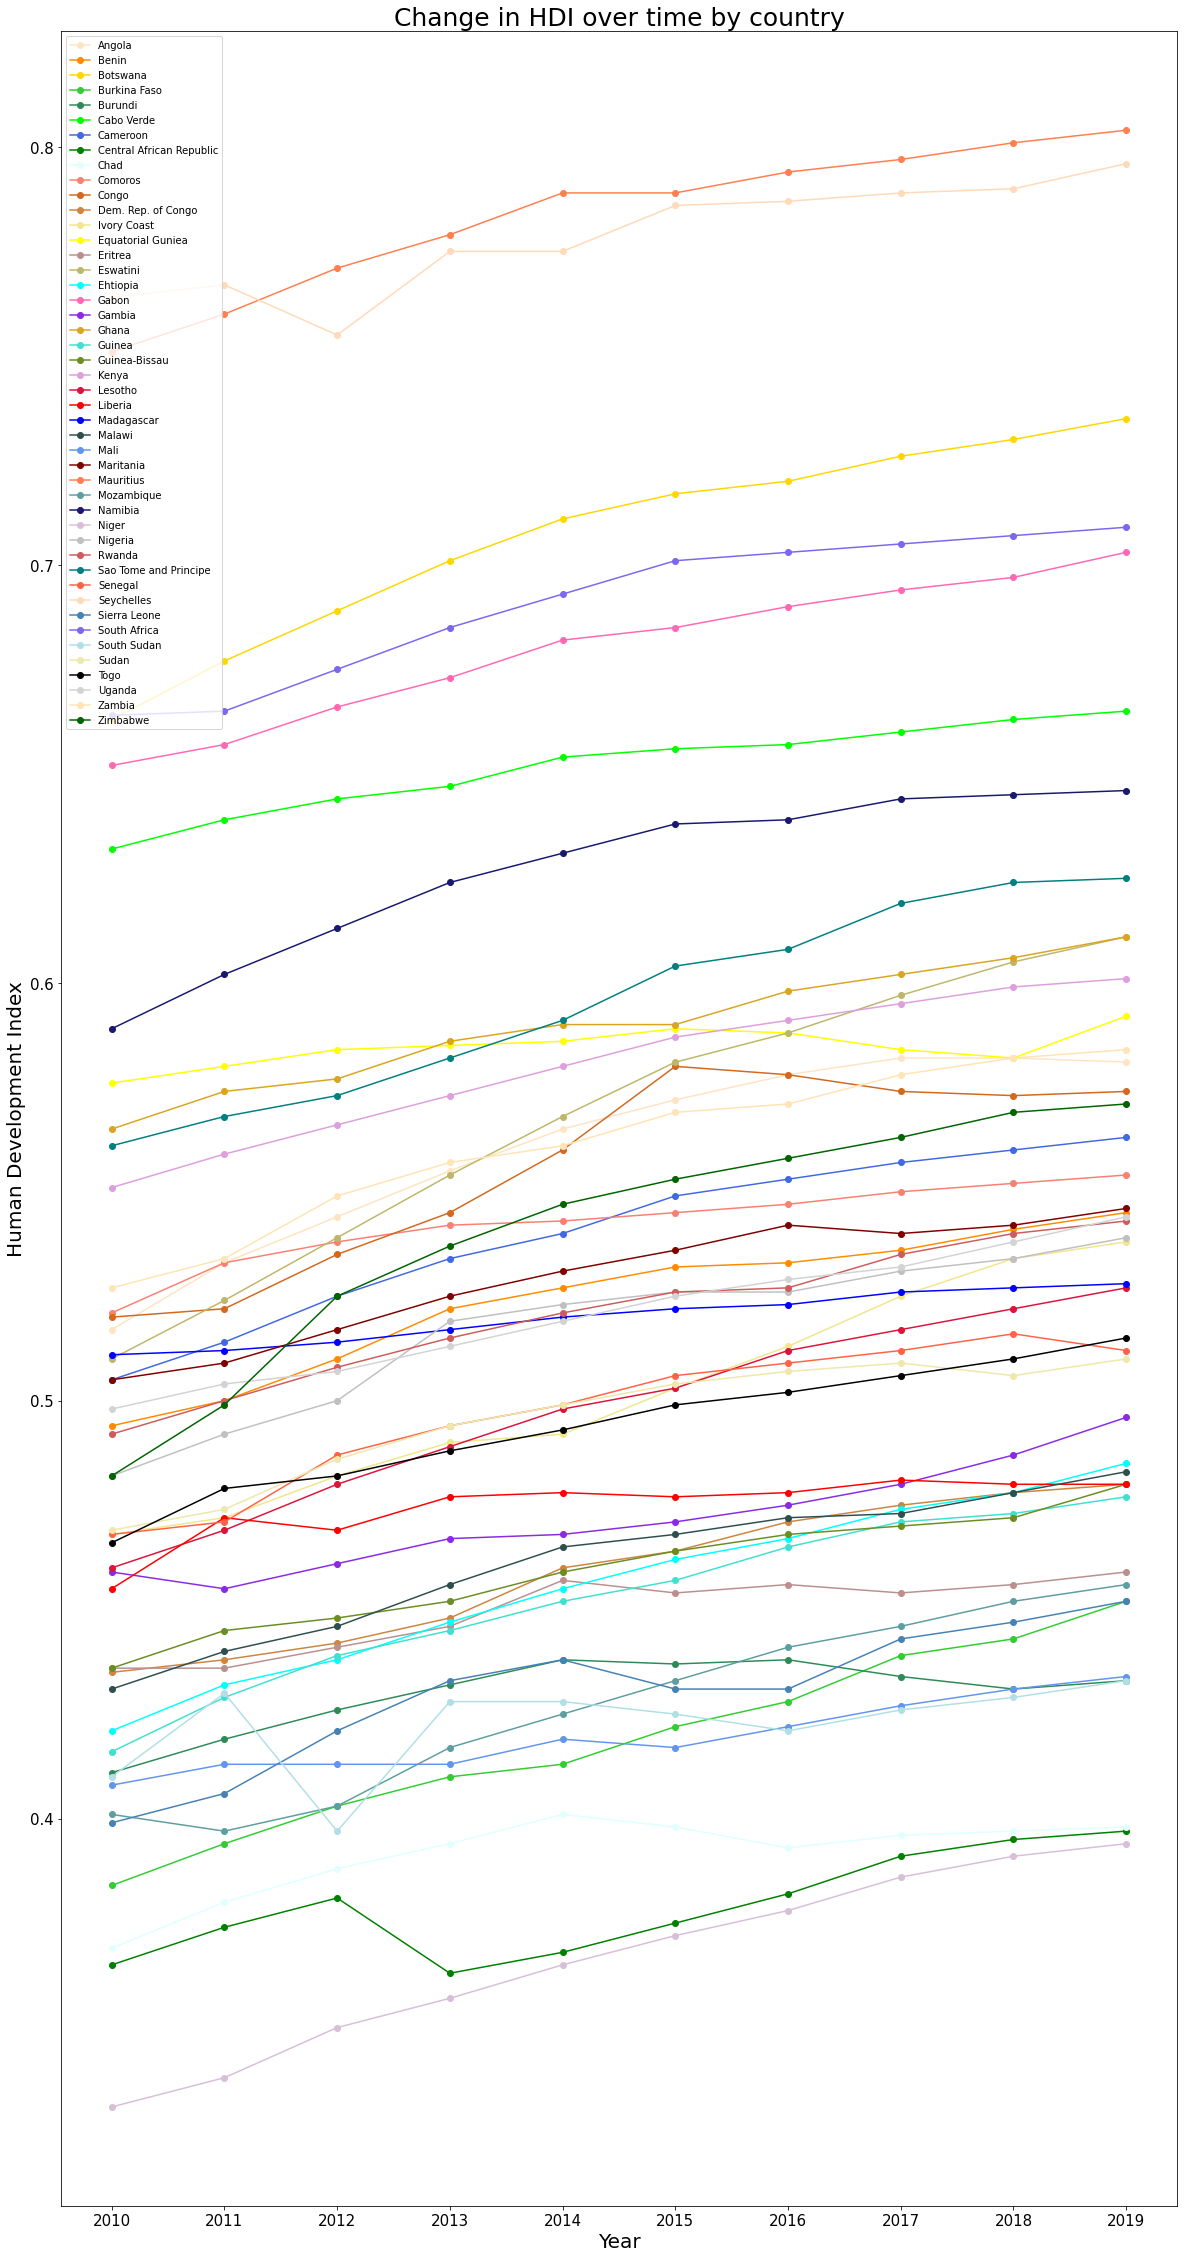

In [330]:
#First I want to see change in HDI over time for each country

#Get years into a list
column_names = list(HDI_SS.columns)
year = column_names[2:]


# create a list of data for each country
# we know there are 46 rows = 46 countries
Angola = HDI_SS.iloc[0].tolist()
Angola = Angola[2:]
Benin = HDI_SS.iloc[1].tolist()
Benin = Benin[2:]
Botswana = HDI_SS.iloc[2].tolist()
Botswana = Botswana[2:]
Burkina_Faso = HDI_SS.iloc[3].tolist()
Burkina_Faso = Burkina_Faso[2:]
Burundi = HDI_SS.iloc[4].tolist()
Burundi = Burundi[2:]
Cabo_Verde = HDI_SS.iloc[5].tolist()
Cabo_Verde = Cabo_Verde[2:]
Cameroon = HDI_SS.iloc[6].tolist()
Cameroon = Cameroon[2:]
CAR = HDI_SS.iloc[7].tolist()
CAR = CAR[2:]
Chad = HDI_SS.iloc[8].tolist()
Chad = Chad[2:]
Comoros = HDI_SS.iloc[9].tolist()
Comoros = Comoros[2:]
Congo = HDI_SS.iloc[10].tolist()
Congo = Congo[2:]
DemOfCongo = HDI_SS.iloc[11].tolist()
DemOfCongo = DemOfCongo[2:]
Ivory_Coast = HDI_SS.iloc[12].tolist()
Ivory_Coast = Ivory_Coast[2:]
EqGuniea = HDI_SS.iloc[13].tolist()
EqGuniea = EqGuniea[2:]
Eritrea = HDI_SS.iloc[14].tolist()
Eritrea = Eritrea[2:]
Eswatini = HDI_SS.iloc[15].tolist()
Eswatini = Eswatini[2:]
Ethiopia = HDI_SS.iloc[16].tolist()
Ethiopia = Ethiopia[2:]
Gabon = HDI_SS.iloc[17].tolist()
Gabon = Gabon[2:]
Gambia = HDI_SS.iloc[18].tolist()
Gambia = Gambia[2:]
Ghana = HDI_SS.iloc[19].tolist()
Ghana = Ghana[2:]
Guinea = HDI_SS.iloc[20].tolist()
Guinea = Guinea[2:]
GBissau = HDI_SS.iloc[21].tolist()
GBissau = GBissau[2:]
Kenya = HDI_SS.iloc[22].tolist()
Kenya = Kenya[2:]
Lesotho = HDI_SS.iloc[23].tolist()
Lesotho = Lesotho[2:]
Liberia = HDI_SS.iloc[24].tolist()
Liberia = Liberia[2:]
Madagascar = HDI_SS.iloc[25].tolist()
Madagascar = Madagascar[2:]
Malawi = HDI_SS.iloc[26].tolist()
Malawi = Malawi[2:]
Mali = HDI_SS.iloc[27].tolist()
Mali = Mali[2:]
Mauritania = HDI_SS.iloc[28].tolist()
Mauritania = Mauritania[2:]
Mauritius = HDI_SS.iloc[29].tolist()
Mauritius = Mauritius[2:]
Mozambique = HDI_SS.iloc[30].tolist()
Mozambique = Mozambique[2:]
Namibia = HDI_SS.iloc[31].tolist()
Namibia = Namibia[2:]
Niger = HDI_SS.iloc[32].tolist()
Niger = Niger[2:]
Nigeria = HDI_SS.iloc[33].tolist()
Nigeria = Nigeria[2:]
Rwanda = HDI_SS.iloc[34].tolist()
Rwanda = Rwanda[2:]
STP = HDI_SS.iloc[35].tolist()
STP = STP[2:]
Senegal = HDI_SS.iloc[36].tolist()
Senegal = Senegal[2:]
Seychelles = HDI_SS.iloc[37].tolist()
Seychelles = Seychelles[2:]
Sierra_Leone = HDI_SS.iloc[38].tolist()
Sierra_Leone = Sierra_Leone[2:]
South_Africa = HDI_SS.iloc[39].tolist()
South_Africa = South_Africa[2:]
South_Sudan = HDI_SS.iloc[40].tolist()
South_Sudan = South_Sudan[2:]
Sudan = HDI_SS.iloc[41].tolist()
Sudan = Sudan[2:]
Togo = HDI_SS.iloc[42].tolist()
Togo = Togo[2:]
Uganda = HDI_SS.iloc[43].tolist()
Uganda = Uganda[2:]
Zambia = HDI_SS.iloc[44].tolist()
Zambia = Zambia[2:]
Zimbabwe = HDI_SS.iloc[45].tolist()
Zimbabwe = Zimbabwe[2:]


#plot each country

plt.figure(figsize=(20,40))
plt.plot(year, Angola, marker ='o', linestyle='-', color = "bisque", label='Angola')
plt.plot(year, Benin, marker ='o', linestyle='-', color = "darkorange", label='Benin')
plt.plot(year, Botswana, marker ='o', linestyle='-', color = "gold", label='Botswana')
plt.plot(year, Burkina_Faso, marker ='o', linestyle='-', color = "limegreen", label='Burkina Faso')
plt.plot(year, Burundi, marker ='o', linestyle='-', color = "seagreen", label='Burundi')
plt.plot(year, Cabo_Verde, marker ='o', linestyle='-', color = "lime", label='Cabo Verde')
plt.plot(year, Cameroon, marker ='o', linestyle='-', color = "royalblue", label='Cameroon')
plt.plot(year, CAR, marker ='o', linestyle='-', color = "g", label='Central African Republic')
plt.plot(year, Chad, marker ='o', linestyle='-', color = "lightcyan", label='Chad')
plt.plot(year, Comoros, marker ='o', linestyle='-', color = "salmon", label='Comoros')
plt.plot(year, Congo, marker ='o', linestyle='-', color = "chocolate", label='Congo')
plt.plot(year, DemOfCongo, marker ='o', linestyle='-', color = "peru", label='Dem. Rep. of Congo')
plt.plot(year, Ivory_Coast, marker ='o', linestyle='-', color = "khaki", label='Ivory Coast')
plt.plot(year, EqGuniea, marker ='o', linestyle='-', color = "yellow", label='Equatorial Guniea')
plt.plot(year, Eritrea, marker ='o', linestyle='-', color = "rosybrown", label='Eritrea')
plt.plot(year, Eswatini, marker ='o', linestyle='-', color = "darkkhaki", label='Eswatini')
plt.plot(year, Ethiopia, marker ='o', linestyle='-', color = "aqua", label='Ehtiopia')
plt.plot(year, Gabon, marker ='o', linestyle='-', color = "hotpink", label='Gabon')
plt.plot(year, Gambia, marker ='o', linestyle='-', color = "blueviolet", label='Gambia')
plt.plot(year, Ghana, marker ='o', linestyle='-', color = "goldenrod", label='Ghana')
plt.plot(year, Guinea, marker ='o', linestyle='-', color = "turquoise", label='Guinea')
plt.plot(year, GBissau, marker ='o', linestyle='-', color = "olivedrab", label='Guinea-Bissau')
plt.plot(year, Kenya, marker ='o', linestyle='-', color = "plum", label='Kenya')
plt.plot(year, Lesotho, marker ='o', linestyle='-', color = "crimson", label='Lesotho')
plt.plot(year, Liberia, marker ='o', linestyle='-', color = "r", label='Liberia')
plt.plot(year, Madagascar, marker ='o', linestyle='-', color = "b", label='Madagascar')
plt.plot(year, Malawi, marker ='o', linestyle='-', color = "darkslategray", label='Malawi')
plt.plot(year, Mali, marker ='o', linestyle='-', color = "cornflowerblue", label='Mali')
plt.plot(year, Mauritania, marker ='o', linestyle='-', color = "maroon", label='Maritania')
plt.plot(year, Mauritius, marker ='o', linestyle='-', color = "coral", label='Mauritius')
plt.plot(year, Mozambique, marker ='o', linestyle='-', color = "cadetblue", label='Mozambique')
plt.plot(year, Namibia, marker ='o', linestyle='-', color = "midnightblue", label='Namibia')
plt.plot(year, Niger, marker ='o', linestyle='-', color = "thistle", label='Niger')
plt.plot(year, Nigeria, marker ='o', linestyle='-', color = "silver", label='Nigeria')
plt.plot(year, Rwanda, marker ='o', linestyle='-', color = "indianred", label='Rwanda')
plt.plot(year, STP, marker ='o', linestyle='-', color = "teal", label='Sao Tome and Principe')
plt.plot(year, Senegal, marker ='o', linestyle='-', color = "tomato", label='Senegal')
plt.plot(year, Seychelles, marker ='o', linestyle='-', color = "peachpuff", label='Seychelles')
plt.plot(year, Sierra_Leone, marker ='o', linestyle='-', color = "steelblue", label='Sierra Leone')
plt.plot(year, South_Africa, marker ='o', linestyle='-', color = "mediumslateblue", label='South Africa')
plt.plot(year, South_Sudan, marker ='o', linestyle='-', color = "powderblue", label='South Sudan')
plt.plot(year, Sudan, marker ='o', linestyle='-', color = "palegoldenrod", label='Sudan')
plt.plot(year, Togo, marker ='o', linestyle='-', color = "black", label='Togo')
plt.plot(year, Uganda, marker ='o', linestyle='-', color = "lightgray", label='Uganda')
plt.plot(year, Zambia, marker ='o', linestyle='-', color = "moccasin", label='Zambia')
plt.plot(year, Zimbabwe, marker ='o', linestyle='-', color = "darkgreen", label='Zimbabwe')
plt.ylabel("Human Development Index", fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Change in HDI over time by country", fontsize=25)
plt.legend()








That visualization was a little less clear than I anticipated. I am really interested in seeing which countries saw the greatest improvement over the decade. To do this I must find the increase in HDI and visualize to show to rankings. 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 <a list of 46 Text major ticklabel objects>)

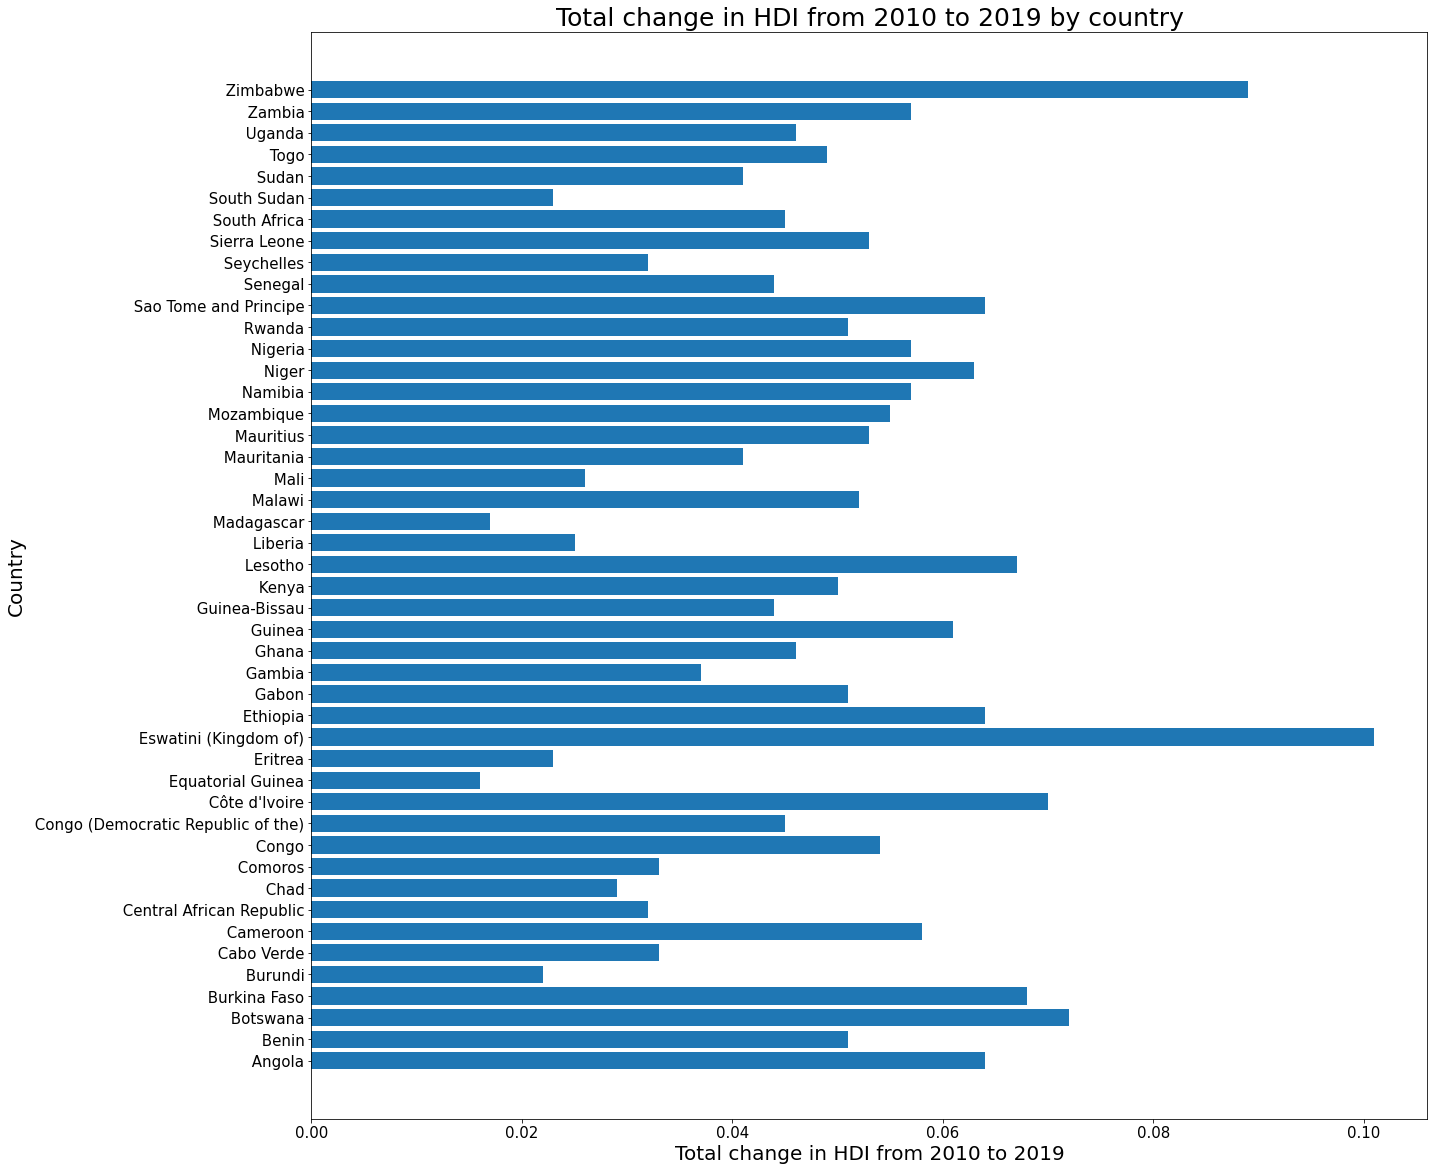

In [331]:
# find the net change for each country
Angola_change = Angola[-1] - Angola[0]
Benin_change = Benin[-1] - Benin[0]
Botswana_change = Botswana[-1] - Botswana[0]
BF_change = Burkina_Faso[-1] - Burkina_Faso[0]
Burundi_change = Burundi[-1] - Burundi[0]
CV_change = Cabo_Verde[-1] - Cabo_Verde[0]
Cameroon_change = Cameroon[-1] - Cameroon[0]
CAR_change = CAR[-1] - CAR[0]
Chad_change = Chad[-1] - Chad[0]
Comoros_change = Comoros[-1] - Comoros[0]
Congo_change = Congo[-1] - Congo[0]
DOC_change = DemOfCongo[-1] - DemOfCongo[0]
IC_change = Ivory_Coast[-1] - Ivory_Coast[0]
EqGuniea_change = EqGuniea[-1] - EqGuniea[0]
Eritrea_change = Eritrea[-1] - Eritrea[0]
Eswatini_change = Eswatini[-1] - Eswatini[0]
Ethiopia_change = Ethiopia[-1] - Ethiopia[0]
Gabon_change = Gabon[-1] - Gabon[0]
Gambia_change = Gambia[-1] - Gambia[0]
Ghana_change = Ghana[-1] - Ghana[0]
Guinea_change = Guinea[-1] - Guinea[0]
GB_change = GBissau[-1] - GBissau[0]
Kenya_change = Kenya[-1] - Kenya[0]
Lesotho_change = Lesotho[-1] - Lesotho[0]
Liberia_change = Liberia[-1] - Liberia[0]
Madagascar_change = Madagascar[-1] - Madagascar[0]
Malawi_change = Malawi[-1] - Malawi[0]
Mali_change = Mali[-1] - Mali[0]
Mauritania_change = Mauritania[-1] - Mauritania[0]
Mauritius_change = Mauritius[-1] - Mauritius[0]
Mozambique_change = Mozambique[-1] - Mozambique[0]
Namibia_change = Namibia[-1] - Namibia[0]
Niger_change = Niger[-1] - Niger[0]
Nigeria_change = Nigeria[-1] - Nigeria[0]
Rwanda_change = Rwanda[-1] - Rwanda[0]
STP_change = STP[-1] - STP[0]
Senegal_change = Senegal[-1] - Senegal[0]
Seychelles_change = Seychelles[-1] - Seychelles[0]
SL_change = Sierra_Leone[-1] - Sierra_Leone[0]
SA_change = South_Africa[-1] - South_Africa[0]
SS_change = South_Sudan[-1] - South_Sudan[0]
Sudan_change = Sudan[-1] - Sudan[0]
Togo_change = Togo[-1] - Togo[0]
Uganda_change = Uganda[-1] - Uganda[0]
Zambia_change = Zambia[-1] - Zambia[0]
Zimbabwe_change = Zimbabwe[-1] - Zimbabwe[0]

# create lists for bar chart
change_list = [Angola_change, Benin_change, Botswana_change, BF_change, Burundi_change, CV_change, Cameroon_change, CAR_change, Chad_change, Comoros_change, Congo_change, DOC_change, IC_change, EqGuniea_change, Eritrea_change, Eswatini_change, Ethiopia_change, Gabon_change, Gambia_change, Ghana_change, Guinea_change, GB_change, Kenya_change, Lesotho_change, Liberia_change, Madagascar_change, Malawi_change, Mali_change, Mauritania_change, Mauritius_change, Mozambique_change, Namibia_change, Niger_change, Nigeria_change, Rwanda_change, STP_change, Senegal_change, Seychelles_change, SL_change, SA_change, SS_change, Sudan_change, Togo_change, Uganda_change, Zambia_change, Zimbabwe_change]
country_list = HDI_SS["Country"].tolist()


#plot bar chart with length of bar representing total change in HDI over decade
plt.figure(figsize= (20, 20))
plt.barh(country_list, change_list)
plt.title("Total change in HDI from 2010 to 2019 by country", fontsize=25)
plt.xlabel("Total change in HDI from 2010 to 2019", fontsize = 20)
plt.ylabel("Country", fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)






This graph clearly shows the most successful countries at quickly improving their human development score. When I transition into the analysis phase, I am particularly interested in the top 3 growers (Eswatini, Zimbabwe, and Botswana). It was also at this point in the exploration that I did a sanity check with the original data to confirm that these data points are accurate. 

For the last part of my exploration, I want to look at the components of HDI (Education Index, Life Expectancy, and Gross National Income). I am interested to see if either one of those components has a stronger correlation with HDI in the aggregate. It could lead to potential questions to address when analyzing the top HDI growers in Sub-Saharan Africa. 

Text(0, 0.5, 'Average HDI')

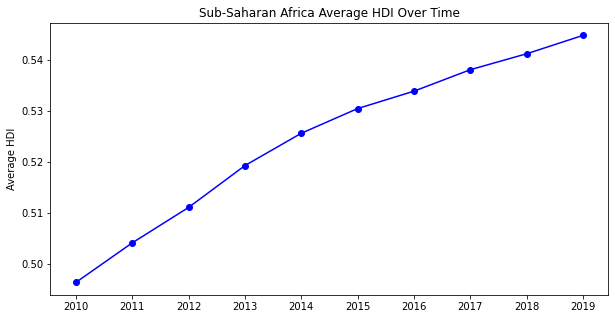

In [332]:
#I need to find the individual aggregate averages of HDI, LE, EI, and GNI for all of 
# sub-saharan Africa per year and plot each one to look at trends in the shape

#HDI aggregate
twoten = HDI_SS["2010"].mean()
twoone = HDI_SS["2011"].mean()
twotwo = HDI_SS["2012"].mean()
twothree = HDI_SS["2013"].mean()
twofour = HDI_SS["2014"].mean()
twofive = HDI_SS["2015"].mean()
twosix = HDI_SS["2016"].mean()
twoseven = HDI_SS["2017"].mean()
twoeight = HDI_SS["2018"].mean()
twonine = HDI_SS["2019"].mean()
HDI_avgs = [twoten, twoone, twotwo, twothree, twofour, twofive, twosix, twoseven, twoeight, twonine]

#plot HDI averages over time
plt.figure(figsize=(10,5))
plt.plot(year, HDI_avgs, marker ='o', linestyle='-', color = "b", label='HDI')
plt.title("Sub-Saharan Africa Average HDI Over Time")
plt.ylabel("Average HDI")

Text(0, 0.5, 'Average EI')

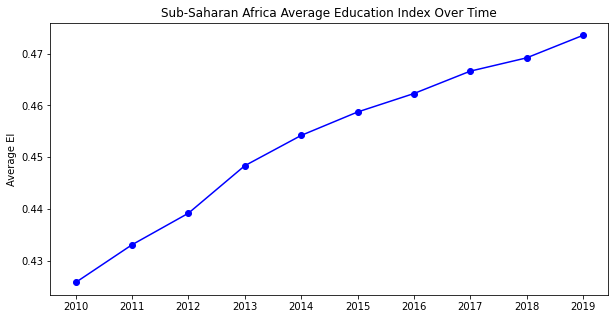

In [333]:
#EI aggregate
etwoten = EI_SS["2010"].mean()
etwoone = EI_SS["2011"].mean()
etwotwo = EI_SS["2012"].mean()
etwothree = EI_SS["2013"].mean()
etwofour = EI_SS["2014"].mean()
etwofive = EI_SS["2015"].mean()
etwosix = EI_SS["2016"].mean()
etwoseven = EI_SS["2017"].mean()
etwoeight = EI_SS["2018"].mean()
etwonine = EI_SS["2019"].mean()
EI_avgs = [etwoten, etwoone, etwotwo, etwothree, etwofour, etwofive, etwosix, etwoseven, etwoeight, etwonine]

#plot EI averages over time
plt.figure(figsize=(10,5))
plt.plot(year, EI_avgs, marker ='o', linestyle='-', color = "b", label='EI')
plt.title("Sub-Saharan Africa Average Education Index Over Time")
plt.ylabel("Average EI")

Text(0, 0.5, 'Average LE')

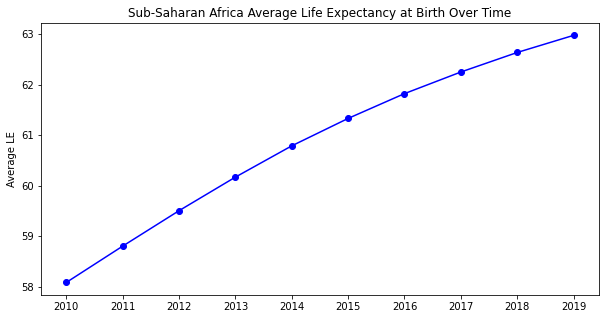

In [334]:
#LE aggregate
ltwoten = LE_SS["2010"].mean()
ltwoone = LE_SS["2011"].mean()
ltwotwo = LE_SS["2012"].mean()
ltwothree = LE_SS["2013"].mean()
ltwofour = LE_SS["2014"].mean()
ltwofive = LE_SS["2015"].mean()
ltwosix = LE_SS["2016"].mean()
ltwoseven = LE_SS["2017"].mean()
ltwoeight = LE_SS["2018"].mean()
ltwonine = LE_SS["2019"].mean()
LE_avgs = [ltwoten, ltwoone, ltwotwo, ltwothree, ltwofour, ltwofive, ltwosix, ltwoseven, ltwoeight, ltwonine]
           
#plot LE averages over time
plt.figure(figsize=(10,5))
plt.plot(year, LE_avgs, marker ='o', linestyle='-', color = "b", label='LE')
plt.title("Sub-Saharan Africa Average Life Expectancy at Birth Over Time")
plt.ylabel("Average LE")

Text(0, 0.5, 'Average GNI')

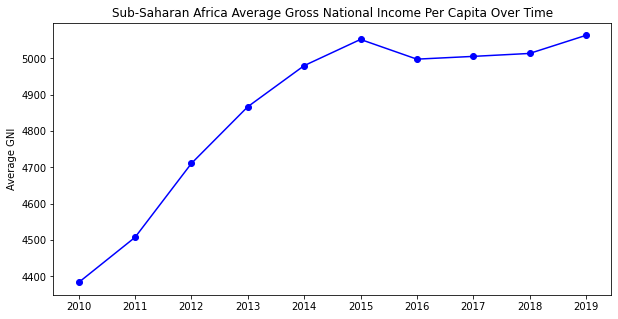

In [335]:
#GNI aggregate 
gtwoten = GNI_SS["2010"].mean()
gtwoone = GNI_SS["2011"].mean()
gtwotwo = GNI_SS["2012"].mean()
gtwothree = GNI_SS["2013"].mean()
gtwofour = GNI_SS["2014"].mean()
gtwofive = GNI_SS["2015"].mean()
gtwosix = GNI_SS["2016"].mean()
gtwoseven = GNI_SS["2017"].mean()
gtwoeight = GNI_SS["2018"].mean()
gtwonine = GNI_SS["2019"].mean()
GNI_avgs = [gtwoten, gtwoone, gtwotwo, gtwothree, gtwofour, gtwofive, gtwosix, gtwoseven, gtwoeight, gtwonine]

#plot GNI averages over time
plt.figure(figsize=(10,5))
plt.plot(year, GNI_avgs, marker ='o', linestyle='-', color = "b", label='GNI')
plt.title("Sub-Saharan Africa Average Gross National Income Per Capita Over Time")
plt.ylabel("Average GNI")

At this point, I did a sanity check on the numbers with the original UN databases, and these graphs check out.

# **Second Part: Question Exploration and Hypothesis Testing**

Questions 1: Which of HDI's components' increase over the past decade has the strongest correlation with HDI's increase over the past decade for the entirety of Sub-Saharan Africa?

Hypothesis: From observing the shape of the raw graphs of Education Index, Life Expectancy, and Gross National Income against the graph of HDI, I hypothesize that the education index has the greatest correlation with HDI increase over the past decade. This would tell us that improvements in education have had the strongest relationship with improvements in HDI over the past decade. 

In [336]:
#first, we need to adjust the 4 graphs directly above to show %change instead of the individual units,
#so we can evenly compare the visualization
# it also changes the correlation
#***this also means there will only be 9 years to show because we can't observe a change in 2010

#HDI average % change in the aggregate
twoone_change = (twoone - twoten)/twoten
twotwo_change = (twotwo - twoone)/twoone
twothree_change = (twothree - twotwo)/twotwo
twofour_change = (twofour - twothree)/twothree
twofive_change = (twofive - twofour)/twofour
twosix_change = (twosix - twofive)/twofive
twoseven_change = (twoseven - twosix)/twosix
twoeight_change = (twoeight - twoseven)/twoseven
twonine_change = (twonine - twoeight)/twoeight
HDI_pch = [twoone_change, twotwo_change, twothree_change, twofour_change, twofive_change, twosix_change, twoseven_change, twoeight_change, twonine_change]
HDI_pch = [element * 100 for element in HDI_pch]


#Education Index average % change in the aggregate
etwoone_change = (etwoone - etwoten)/etwoten
etwotwo_change = (etwotwo - etwoone)/etwoone
etwothree_change = (etwothree - etwotwo)/etwotwo
etwofour_change = (etwofour - etwothree)/etwothree
etwofive_change = (etwofive - etwofour)/etwofour
etwosix_change = (etwosix - etwofive)/etwofive
etwoseven_change = (etwoseven - etwosix)/etwosix
etwoeight_change = (etwoeight - etwoseven)/etwoseven
etwonine_change = (etwonine - etwoeight)/etwoeight
EI_pch = [etwoone_change, etwotwo_change, etwothree_change, etwofour_change, etwofive_change, etwosix_change, etwoseven_change, etwoeight_change, etwonine_change]
EI_pch = [element * 100 for element in EI_pch]

#Life Expectancy average % change in the aggregate
ltwoone_change = (ltwoone - ltwoten)/ltwoten
ltwotwo_change = (ltwotwo - ltwoone)/ltwoone
ltwothree_change = (ltwothree - ltwotwo)/ltwotwo
ltwofour_change = (ltwofour - ltwothree)/ltwothree
ltwofive_change = (ltwofive - ltwofour)/ltwofour
ltwosix_change = (ltwosix - ltwofive)/ltwofive
ltwoseven_change = (ltwoseven - ltwosix)/ltwosix
ltwoeight_change = (ltwoeight - ltwoseven)/ltwoseven
ltwonine_change = (ltwonine - ltwoeight)/ltwoeight
LE_pch = [ltwoone_change, ltwotwo_change, ltwothree_change, ltwofour_change, ltwofive_change, ltwosix_change, ltwoseven_change, ltwoeight_change, ltwonine_change]
LE_pch = [element * 100 for element in LE_pch]

#Gross National Income average % change in the aggregate
gtwoone_change = (gtwoone - gtwoten)/gtwoten
gtwotwo_change = (gtwotwo - gtwoone)/gtwoone
gtwothree_change = (gtwothree - gtwotwo)/gtwotwo
gtwofour_change = (gtwofour - gtwothree)/gtwothree
gtwofive_change = (gtwofive - gtwofour)/gtwofour
gtwosix_change = (gtwosix - gtwofive)/gtwofive
gtwoseven_change = (gtwoseven - gtwosix)/gtwosix
gtwoeight_change = (gtwoeight - gtwoseven)/gtwoseven
gtwonine_change = (gtwonine - gtwoeight)/gtwoeight
GNI_pch = [gtwoone_change, gtwotwo_change, gtwothree_change, gtwofour_change, gtwofive_change, gtwosix_change, gtwoseven_change, gtwoeight_change, gtwonine_change]
GNI_pch = [element * 100 for element in GNI_pch]

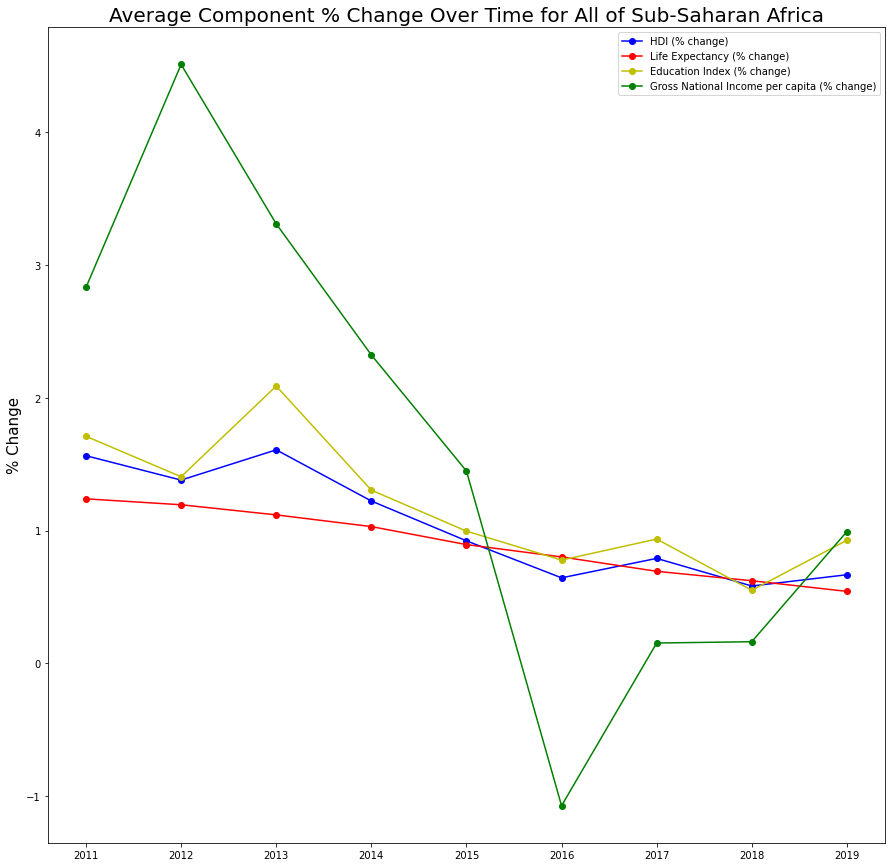

In [337]:
#plot each % change against updated year list

#take out 2010
pch_year = year[1:]

#plot % changes against each other
plt.figure(figsize= (15,15))
plt.plot(pch_year, HDI_pch, marker ='o', linestyle='-', color = "b", label='HDI (% change)')
plt.plot(pch_year, LE_pch, marker ='o', linestyle='-', color = "r", label='Life Expectancy (% change)')
plt.plot(pch_year, EI_pch, marker ='o', linestyle='-', color = "y", label='Education Index (% change)')
plt.plot(pch_year, GNI_pch, marker ='o', linestyle='-', color = "g", label='Gross National Income per capita (% change)')
plt.ylabel("% Change", fontsize = 15)
plt.title("Average Component % Change Over Time for All of Sub-Saharan Africa", fontsize= 20)
plt.legend()



In [338]:
#the correlation appears to be strongest with Education Index, but I will do the calculation to make sure
from scipy.stats import pearsonr
#EI vs HDI correlation
correlation, p_value = pearsonr(HDI_pch, EI_pch)
print("Eduction Index vs. HDI = ", correlation)
#LE vs HDI correlation
correlation, p_value = pearsonr(HDI_pch, LE_pch)
print("Life Expectancy vs. HDI = ", correlation)
#GNI vs. HDI correlation
correlation, p_value = pearsonr(HDI_pch, GNI_pch)
print("Gross National Income vs. HDI = ", correlation)


#as it is shown, change in EI has the highest correlation with change in HDI for all of Sub-Saharan Africa


Eduction Index vs. HDI =  0.9584908743042713
Life Expectancy vs. HDI =  0.9320688268139777
Gross National Income vs. HDI =  0.8761916686066716


Question 2: Are the correlations for each of the decade's top HDI growers with the individual components significantly different from the aggregate or from each other?

Hypothesis: I would assume that the correlations will be slightly different, hypothesizing that the top performers were doing something differently than the rest of the pack. I think that the correlations between the top three would be more similar between each other than with the aggregate under the belief that they were doing something similar to acheive higher HDI growth, even if that just means hitting a certain stage in their growth. 

In [339]:
# to start, we need to find the numbers for each component for each country
# recalling the data exploration part, the top three growers over the decade were Eswatini, Zimbabwe, and Botswana

#Eswatini
EswatiniHDI = Eswatini
EswatiniLE = LE_SS.iloc[15].tolist()
EswatiniLE = EswatiniLE[2:]
EswatiniEI = EI_SS.iloc[15].tolist()
EswatiniEI = EswatiniEI[2:]
EswatiniGNI = GNI_SS.iloc[15].tolist()
EswatiniGNI = EswatiniGNI[2:]

#Zimbabwe
ZimbabweHDI = Zimbabwe
ZimbabweLE = LE_SS.iloc[45].tolist()
ZimbabweLE = ZimbabweLE[2:]
ZimbabweEI = EI_SS.iloc[45].tolist()
ZimbabweEI = ZimbabweEI[2:]
ZimbabweGNI = GNI_SS.iloc[45].tolist()
ZimbabweGNI = ZimbabweGNI[2:]

#Botswana
BotswanaHDI = Botswana
BotswanaLE = LE_SS.iloc[2].tolist()
BotswanaLE = BotswanaLE[2:]
BotswanaEI = EI_SS.iloc[2].tolist()
BotswanaEI = BotswanaEI[2:]
BotswanaGNI = GNI_SS.iloc[2].tolist()
BotswanaGNI = BotswanaGNI[2:]



In [340]:
# convert each of these lists to % change by year instead of the actual values

#Eswatini
#HDI % change
ehtwoone_change = (EswatiniHDI[1]-EswatiniHDI[0])/EswatiniHDI[0]
ehtwotwo_change = (EswatiniHDI[2]-EswatiniHDI[1])/EswatiniHDI[1]
ehtwothree_change = (EswatiniHDI[3]-EswatiniHDI[2])/EswatiniHDI[2]
ehtwofour_change = (EswatiniHDI[4]-EswatiniHDI[3])/EswatiniHDI[3]
ehtwofive_change = (EswatiniHDI[5]-EswatiniHDI[4])/EswatiniHDI[4]
ehtwosix_change = (EswatiniHDI[6]-EswatiniHDI[5])/EswatiniHDI[5]
ehtwoseven_change = (EswatiniHDI[7]-EswatiniHDI[6])/EswatiniHDI[6]
ehtwoeight_change = (EswatiniHDI[8]-EswatiniHDI[7])/EswatiniHDI[7]
ehtwonine_change = (EswatiniHDI[9]-EswatiniHDI[8])/EswatiniHDI[8]
eh_pch = [ehtwoone_change, ehtwotwo_change, ehtwothree_change, ehtwofour_change, ehtwofive_change, ehtwosix_change, ehtwoseven_change, ehtwoeight_change, ehtwonine_change]

#LE % change
eltwoone_change = (EswatiniLE[1]-EswatiniLE[0])/EswatiniLE[0]
eltwotwo_change = (EswatiniLE[2]-EswatiniLE[1])/EswatiniLE[1]
eltwothree_change = (EswatiniLE[3]-EswatiniLE[2])/EswatiniLE[2]
eltwofour_change = (EswatiniLE[4]-EswatiniLE[3])/EswatiniLE[3]
eltwofive_change = (EswatiniLE[5]-EswatiniLE[4])/EswatiniLE[4]
eltwosix_change = (EswatiniLE[6]-EswatiniLE[5])/EswatiniLE[5]
eltwoseven_change = (EswatiniLE[7]-EswatiniLE[6])/EswatiniLE[6]
eltwoeight_change = (EswatiniLE[8]-EswatiniLE[7])/EswatiniLE[7]
eltwonine_change = (EswatiniLE[9]-EswatiniLE[8])/EswatiniLE[8]
el_pch = [eltwoone_change, eltwotwo_change, eltwothree_change, eltwofour_change, eltwofive_change, eltwosix_change, eltwoseven_change, eltwoeight_change, eltwonine_change]

#EI % change
eetwoone_change = (EswatiniEI[1]-EswatiniEI[0])/EswatiniEI[0]
eetwotwo_change = (EswatiniEI[2]-EswatiniEI[1])/EswatiniEI[1]
eetwothree_change = (EswatiniEI[3]-EswatiniEI[2])/EswatiniEI[2]
eetwofour_change = (EswatiniEI[4]-EswatiniEI[3])/EswatiniEI[3]
eetwofive_change = (EswatiniEI[5]-EswatiniEI[4])/EswatiniEI[4]
eetwosix_change = (EswatiniEI[6]-EswatiniEI[5])/EswatiniEI[5]
eetwoseven_change = (EswatiniEI[7]-EswatiniEI[6])/EswatiniEI[6]
eetwoeight_change = (EswatiniEI[8]-EswatiniEI[7])/EswatiniEI[7]
eetwonine_change = (EswatiniEI[9]-EswatiniEI[8])/EswatiniEI[8]
ee_pch = [eetwoone_change, eetwotwo_change, eetwothree_change, eetwofour_change, eetwofive_change, eetwosix_change, eetwoseven_change, eetwoeight_change, eetwonine_change]

#GNI % change
egtwoone_change = (EswatiniGNI[1]-EswatiniGNI[0])/EswatiniGNI[0]
egtwotwo_change = (EswatiniGNI[2]-EswatiniGNI[1])/EswatiniGNI[1]
egtwothree_change = (EswatiniGNI[3]-EswatiniGNI[2])/EswatiniGNI[2]
egtwofour_change = (EswatiniGNI[4]-EswatiniGNI[3])/EswatiniGNI[3]
egtwofive_change = (EswatiniGNI[5]-EswatiniGNI[4])/EswatiniGNI[4]
egtwosix_change = (EswatiniGNI[6]-EswatiniGNI[5])/EswatiniGNI[5]
egtwoseven_change = (EswatiniGNI[7]-EswatiniGNI[6])/EswatiniGNI[6]
egtwoeight_change = (EswatiniGNI[8]-EswatiniGNI[7])/EswatiniGNI[7]
egtwonine_change = (EswatiniGNI[9]-EswatiniGNI[8])/EswatiniGNI[8]
eg_pch = [egtwoone_change, egtwotwo_change, egtwothree_change, egtwofour_change, egtwofive_change, egtwosix_change, egtwoseven_change, egtwoeight_change, egtwonine_change]


In [341]:
#Zimbabwe
#HDI % change
zhtwoone_change = (ZimbabweHDI[1]-ZimbabweHDI[0])/ZimbabweHDI[0]
zhtwotwo_change = (ZimbabweHDI[2]-ZimbabweHDI[1])/ZimbabweHDI[1]
zhtwothree_change = (ZimbabweHDI[3]-ZimbabweHDI[2])/ZimbabweHDI[2]
zhtwofour_change = (ZimbabweHDI[4]-ZimbabweHDI[3])/ZimbabweHDI[3]
zhtwofive_change = (ZimbabweHDI[5]-ZimbabweHDI[4])/ZimbabweHDI[4]
zhtwosix_change = (ZimbabweHDI[6]-ZimbabweHDI[5])/ZimbabweHDI[5]
zhtwoseven_change = (ZimbabweHDI[7]-ZimbabweHDI[6])/ZimbabweHDI[6]
zhtwoeight_change = (ZimbabweHDI[8]-ZimbabweHDI[7])/ZimbabweHDI[7]
zhtwonine_change = (ZimbabweHDI[9]-ZimbabweHDI[8])/ZimbabweHDI[8]
zh_pch = [zhtwoone_change, zhtwotwo_change, zhtwothree_change, zhtwofour_change, zhtwofive_change, zhtwosix_change, zhtwoseven_change, zhtwoeight_change, zhtwonine_change]

#LE % change
zltwoone_change = (ZimbabweLE[1]-ZimbabweLE[0])/ZimbabweLE[0]
zltwotwo_change = (ZimbabweLE[2]-ZimbabweLE[1])/ZimbabweLE[1]
zltwothree_change = (ZimbabweLE[3]-ZimbabweLE[2])/ZimbabweLE[2]
zltwofour_change = (ZimbabweLE[4]-ZimbabweLE[3])/ZimbabweLE[3]
zltwofive_change = (ZimbabweLE[5]-ZimbabweLE[4])/ZimbabweLE[4]
zltwosix_change = (ZimbabweLE[6]-ZimbabweLE[5])/ZimbabweLE[5]
zltwoseven_change = (ZimbabweLE[7]-ZimbabweLE[6])/ZimbabweLE[6]
zltwoeight_change = (ZimbabweLE[8]-ZimbabweLE[7])/ZimbabweLE[7]
zltwonine_change = (ZimbabweLE[9]-ZimbabweLE[8])/ZimbabweLE[8]
zl_pch = [zltwoone_change, zltwotwo_change, zltwothree_change, zltwofour_change, zltwofive_change, zltwosix_change, zltwoseven_change, zltwoeight_change, zltwonine_change]

#EI % change
zetwoone_change = (ZimbabweEI[1]-ZimbabweEI[0])/ZimbabweEI[0]
zetwotwo_change = (ZimbabweEI[2]-ZimbabweEI[1])/ZimbabweEI[1]
zetwothree_change = (ZimbabweEI[3]-ZimbabweEI[2])/ZimbabweEI[2]
zetwofour_change = (ZimbabweEI[4]-ZimbabweEI[3])/ZimbabweEI[3]
zetwofive_change = (ZimbabweEI[5]-ZimbabweEI[4])/ZimbabweEI[4]
zetwosix_change = (ZimbabweEI[6]-ZimbabweEI[5])/ZimbabweEI[5]
zetwoseven_change = (ZimbabweEI[7]-ZimbabweEI[6])/ZimbabweEI[6]
zetwoeight_change = (ZimbabweEI[8]-ZimbabweEI[7])/ZimbabweEI[7]
zetwonine_change = (ZimbabweEI[9]-ZimbabweEI[8])/ZimbabweEI[8]
ze_pch = [zetwoone_change, zetwotwo_change, zetwothree_change, zetwofour_change, zetwofive_change, zetwosix_change, zetwoseven_change, zetwoeight_change, zetwonine_change]

#GNI % change
zgtwoone_change = (ZimbabweGNI[1]-ZimbabweGNI[0])/ZimbabweGNI[0]
zgtwotwo_change = (ZimbabweGNI[2]-ZimbabweGNI[1])/ZimbabweGNI[1]
zgtwothree_change = (ZimbabweGNI[3]-ZimbabweGNI[2])/ZimbabweGNI[2]
zgtwofour_change = (ZimbabweGNI[4]-ZimbabweGNI[3])/ZimbabweGNI[3]
zgtwofive_change = (ZimbabweGNI[5]-ZimbabweGNI[4])/ZimbabweGNI[4]
zgtwosix_change = (ZimbabweGNI[6]-ZimbabweGNI[5])/ZimbabweGNI[5]
zgtwoseven_change = (ZimbabweGNI[7]-ZimbabweGNI[6])/ZimbabweGNI[6]
zgtwoeight_change = (ZimbabweGNI[8]-ZimbabweGNI[7])/ZimbabweGNI[7]
zgtwonine_change = (ZimbabweGNI[9]-ZimbabweGNI[8])/ZimbabweGNI[8]
zg_pch = [zgtwoone_change, zgtwotwo_change, zgtwothree_change, zgtwofour_change, zgtwofive_change, zgtwosix_change, zgtwoseven_change, zgtwoeight_change, zgtwonine_change]


In [342]:
#Botswana
#HDI % change
bhtwoone_change = (BotswanaHDI[1]-BotswanaHDI[0])/BotswanaHDI[0]
bhtwotwo_change = (BotswanaHDI[2]-BotswanaHDI[1])/BotswanaHDI[1]
bhtwothree_change = (BotswanaHDI[3]-BotswanaHDI[2])/BotswanaHDI[2]
bhtwofour_change = (BotswanaHDI[4]-BotswanaHDI[3])/BotswanaHDI[3]
bhtwofive_change = (BotswanaHDI[5]-BotswanaHDI[4])/BotswanaHDI[4]
bhtwosix_change = (BotswanaHDI[6]-BotswanaHDI[5])/BotswanaHDI[5]
bhtwoseven_change = (BotswanaHDI[7]-BotswanaHDI[6])/BotswanaHDI[6]
bhtwoeight_change = (BotswanaHDI[8]-BotswanaHDI[7])/BotswanaHDI[7]
bhtwonine_change = (BotswanaHDI[9]-BotswanaHDI[8])/BotswanaHDI[8]
bh_pch = [bhtwoone_change, bhtwotwo_change, bhtwothree_change, bhtwofour_change, bhtwofive_change, bhtwosix_change, bhtwoseven_change, bhtwoeight_change, bhtwonine_change]

#LE % change
bltwoone_change = (BotswanaLE[1]-BotswanaLE[0])/BotswanaLE[0]
bltwotwo_change = (BotswanaLE[2]-BotswanaLE[1])/BotswanaLE[1]
bltwothree_change = (BotswanaLE[3]-BotswanaLE[2])/BotswanaLE[2]
bltwofour_change = (BotswanaLE[4]-BotswanaLE[3])/BotswanaLE[3]
bltwofive_change = (BotswanaLE[5]-BotswanaLE[4])/BotswanaLE[4]
bltwosix_change = (BotswanaLE[6]-BotswanaLE[5])/BotswanaLE[5]
bltwoseven_change = (BotswanaLE[7]-BotswanaLE[6])/BotswanaLE[6]
bltwoeight_change = (BotswanaLE[8]-BotswanaLE[7])/BotswanaLE[7]
bltwonine_change = (BotswanaLE[9]-BotswanaLE[8])/BotswanaLE[8]
bl_pch = [bltwoone_change, bltwotwo_change, bltwothree_change, bltwofour_change, bltwofive_change, bltwosix_change, bltwoseven_change, bltwoeight_change, bltwonine_change]

#EI % change
betwoone_change = (BotswanaEI[1]-BotswanaEI[0])/BotswanaEI[0]
betwotwo_change = (BotswanaEI[2]-BotswanaEI[1])/BotswanaEI[1]
betwothree_change = (BotswanaEI[3]-BotswanaEI[2])/BotswanaEI[2]
betwofour_change = (BotswanaEI[4]-BotswanaEI[3])/BotswanaEI[3]
betwofive_change = (BotswanaEI[5]-BotswanaEI[4])/BotswanaEI[4]
betwosix_change = (BotswanaEI[6]-BotswanaEI[5])/BotswanaEI[5]
betwoseven_change = (BotswanaEI[7]-BotswanaEI[6])/BotswanaEI[6]
betwoeight_change = (BotswanaEI[8]-BotswanaEI[7])/BotswanaEI[7]
betwonine_change = (BotswanaEI[9]-BotswanaEI[8])/BotswanaEI[8]
be_pch = [betwoone_change, betwotwo_change, betwothree_change, betwofour_change, betwofive_change, betwosix_change, betwoseven_change, betwoeight_change, betwonine_change]

#GNI % change
bgtwoone_change = (BotswanaGNI[1]-BotswanaGNI[0])/BotswanaGNI[0]
bgtwotwo_change = (BotswanaGNI[2]-BotswanaGNI[1])/BotswanaGNI[1]
bgtwothree_change = (BotswanaGNI[3]-BotswanaGNI[2])/BotswanaGNI[2]
bgtwofour_change = (BotswanaGNI[4]-BotswanaGNI[3])/BotswanaGNI[3]
bgtwofive_change = (BotswanaGNI[5]-BotswanaGNI[4])/BotswanaGNI[4]
bgtwosix_change = (BotswanaGNI[6]-BotswanaGNI[5])/BotswanaGNI[5]
bgtwoseven_change = (BotswanaGNI[7]-BotswanaGNI[6])/BotswanaGNI[6]
bgtwoeight_change = (BotswanaGNI[8]-BotswanaGNI[7])/BotswanaGNI[7]
bgtwonine_change = (BotswanaGNI[9]-BotswanaGNI[8])/BotswanaGNI[8]
bg_pch = [bgtwoone_change, bgtwotwo_change, bgtwothree_change, bgtwofour_change, bgtwofive_change, bgtwosix_change, bgtwoseven_change, bgtwoeight_change, bgtwonine_change]

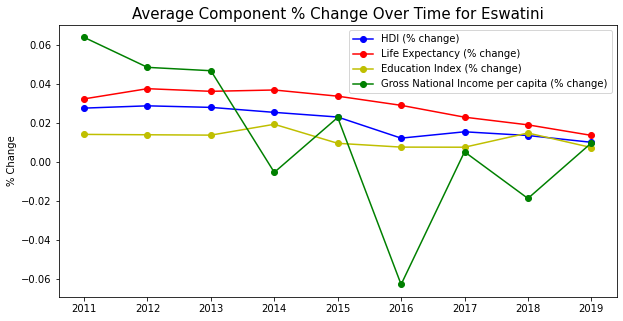

In [343]:
# graph each countries components in its own graph

#Eswatini
plt.figure(figsize= (10,5))
plt.plot(pch_year, eh_pch, marker ='o', linestyle='-', color = "b", label='HDI (% change)')
plt.plot(pch_year, el_pch, marker ='o', linestyle='-', color = "r", label='Life Expectancy (% change)')
plt.plot(pch_year, ee_pch, marker ='o', linestyle='-', color = "y", label='Education Index (% change)')
plt.plot(pch_year, eg_pch, marker ='o', linestyle='-', color = "g", label='Gross National Income per capita (% change)')
plt.ylabel("% Change", fontsize = 10)
plt.title("Average Component % Change Over Time for Eswatini", fontsize= 15)
plt.legend()


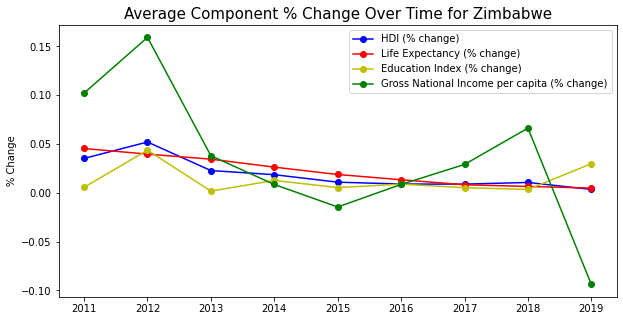

In [344]:
#Zimbabwe
plt.figure(figsize= (10,5))
plt.plot(pch_year, zh_pch, marker ='o', linestyle='-', color = "b", label='HDI (% change)')
plt.plot(pch_year, zl_pch, marker ='o', linestyle='-', color = "r", label='Life Expectancy (% change)')
plt.plot(pch_year, ze_pch, marker ='o', linestyle='-', color = "y", label='Education Index (% change)')
plt.plot(pch_year, zg_pch, marker ='o', linestyle='-', color = "g", label='Gross National Income per capita (% change)')
plt.ylabel("% Change", fontsize = 10)
plt.title("Average Component % Change Over Time for Zimbabwe", fontsize= 15)
plt.legend()

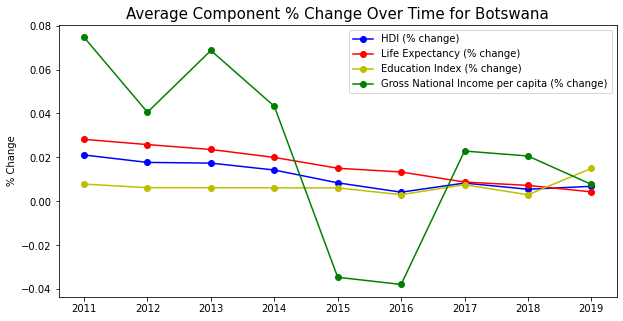

In [345]:
#Botswana
plt.figure(figsize= (10,5))
plt.plot(pch_year, bh_pch, marker ='o', linestyle='-', color = "b", label='HDI (% change)')
plt.plot(pch_year, bl_pch, marker ='o', linestyle='-', color = "r", label='Life Expectancy (% change)')
plt.plot(pch_year, be_pch, marker ='o', linestyle='-', color = "y", label='Education Index (% change)')
plt.plot(pch_year, bg_pch, marker ='o', linestyle='-', color = "g", label='Gross National Income per capita (% change)')
plt.ylabel("% Change", fontsize = 10)
plt.title("Average Component % Change Over Time for Botswana", fontsize= 15)
plt.legend()

In [346]:
#check correlations
#Eswatini
correlation, p_value = pearsonr(eh_pch, ee_pch)
print("Eswatini: EI vs. HDI = ", correlation)
correlation, p_value = pearsonr(eh_pch, el_pch)
print("Eswatini: LE vs. HDI = ", correlation)
correlation, p_value = pearsonr(eh_pch, eg_pch)
print("Eswatini: GNI vs. HDI = ", correlation)
print()

#Zimbabwe
correlation, p_value = pearsonr(zh_pch, ze_pch)
print("Zimbabwe: EI vs. HDI = ", correlation)
correlation, p_value = pearsonr(zh_pch, zl_pch)
print("Zimbabwe: LE vs. HDI = ", correlation)
correlation, p_value = pearsonr(zh_pch, zg_pch)
print("Zimbabwe: GNI vs. HDI = ", correlation)
print()

#Botswana
correlation, p_value = pearsonr(bh_pch, be_pch)
print("Botswana: EI vs. HDI = ", correlation)
correlation, p_value = pearsonr(bh_pch, bl_pch)
print("Botswana: LE vs. HDI = ", correlation)
correlation, p_value = pearsonr(bh_pch, bg_pch)
print("Botswana: GNI vs. HDI = ", correlation)



Eswatini: EI vs. HDI =  0.6396033803699559
Eswatini: LE vs. HDI =  0.8819529991028152
Eswatini: GNI vs. HDI =  0.7463892582644187

Zimbabwe: EI vs. HDI =  0.4789898631105538
Zimbabwe: LE vs. HDI =  0.8740695691891619
Zimbabwe: GNI vs. HDI =  0.8551928453940894

Botswana: EI vs. HDI =  0.0745614921205372
Botswana: LE vs. HDI =  0.9104070540236903
Botswana: GNI vs. HDI =  0.8329148439674214


At this point, I went back and sanity checked the lists used in the correlations, and they all came back accurate

Question 3: Are there any factors outside of HDI's components that could have stronger relationships to HDI's % increases for the top 3 countries? Specifically, Foreign Direct Investment?

Hypothesis: FDI will not have a better correlation that the strongest relationship with an HDI component for any of the top countries. Otherwise, I would assume that direct foreign investment is a better proxy for HDI than its own internal components.

In [347]:
# first we have to read in and clean the FDI (Foreign Direct Investment)
# database the exact same way we did with the original four databases (it is also from the UN Data Catalog)

FDI_read = pd.read_csv('Foreign Direct Investment.csv')
FDI = pd.DataFrame(FDI_read)
FDI.head()

,HDI Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,..,..,..,4.4,1.2,0.3,0.3,0.2,0.2,0.8,0.5,0.3,0.6,0.1
1,69,Albania,0,2.9,4.1,3.3,9.1,8.1,7.5,9.8,8.7,8.7,8.8,7.9,8,7.9
2,91,Algeria,0,0,0.5,1.1,1.4,1.3,0.7,0.8,0.7,-0.3,1,0.7,0.9,..
3,148,Angola,-3,8.5,9.6,-3.5,-3.9,-2.7,-1.1,-5.2,2.5,8.6,-0.2,-6.1,-6.4,-4.3
4,78,Antigua and Barbuda,13.2,5.5,5.2,21.6,8.4,5.7,10.8,11.4,3.7,8.5,6.8,10.7,8.4,..


In [348]:
FDI_drop = FDI.drop(["1990", "1995", "2000", "2005"], axis=1)

FDI_SS = FDI_drop[FDI_drop["Country"].isin(subsaharan)]
FDI_SS.head()

,HDI Rank,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,148,Angola,-3.9,-2.7,-1.1,-5.2,2.5,8.6,-0.2,-6.1,-6.4,-4.3
17,158,Benin,0.6,1.5,2.5,2.9,3.1,1.2,1.1,1.1,1,..
21,100,Botswana,1.7,1.9,1.1,0.5,3.2,2.6,0.8,1,1.2,..
25,182,Burkina Faso,0.4,1.2,2.6,3.6,2.6,2,3,0,1.7,..
26,185,Burundi,0,0.1,0,4.8,3,1.6,0,0,0,..


In [349]:
#remove Somalia
FDI_SS = FDI_SS[FDI_SS["Country"].str.contains("Somalia")==False]
# can't change datatype directly because of negative integers and non integers, so I will have to convert
# the strings to number later

In [350]:
#find the foreign direct investment for each of the top 3 countries
# since Zimbabwe and Botswana don't have data points for 2019, we will remove that year from analysis
# change to float
#Eswatini
EswatiniFDI = FDI_SS.iloc[15].tolist()
EswatiniFDI = EswatiniFDI[2:-1]
EswatiniFDI = [float(i) for i in EswatiniFDI]
#Zimbabwe
ZimbabweFDI = FDI_SS.iloc[45].tolist()
ZimbabweFDI = ZimbabweFDI[2:-1]
ZimbabweFDI = [float(i) for i in ZimbabweFDI]
#Botswana
BotswanaFDI = FDI_SS.iloc[2].tolist()
BotswanaFDI = BotswanaFDI[2:-1]
BotswanaFDI = [float(i) for i in BotswanaFDI]



In [351]:
#find % change for FDI for each country
#Eswatini
eftwoone_change = (EswatiniFDI[1]-EswatiniFDI[0])/EswatiniFDI[0]
eftwotwo_change = (EswatiniFDI[2]-EswatiniFDI[1])/EswatiniFDI[1]
eftwothree_change = (EswatiniFDI[3]-EswatiniFDI[2])/EswatiniFDI[2]
eftwofour_change = (EswatiniFDI[4]-EswatiniFDI[3])/EswatiniFDI[3]
eftwofive_change = (EswatiniFDI[5]-EswatiniFDI[4])/EswatiniFDI[4]
eftwosix_change = (EswatiniFDI[6]-EswatiniFDI[5])/EswatiniFDI[5]
eftwoseven_change = (EswatiniFDI[7]-EswatiniFDI[6])/EswatiniFDI[6]
eftwoeight_change = (EswatiniFDI[8]-EswatiniFDI[7])/EswatiniFDI[7]
ef_pch = [eftwoone_change, eftwotwo_change, eftwothree_change, eftwofour_change, eftwofive_change, eftwosix_change, eftwoseven_change, eftwoeight_change]

#Zimbabwe
zftwoone_change = (ZimbabweFDI[1]-ZimbabweFDI[0])/ZimbabweFDI[0]
zftwotwo_change = (ZimbabweFDI[2]-ZimbabweFDI[1])/ZimbabweFDI[1]
zftwothree_change = (ZimbabweFDI[3]-ZimbabweFDI[2])/ZimbabweFDI[2]
zftwofour_change = (ZimbabweFDI[4]-ZimbabweFDI[3])/ZimbabweFDI[3]
zftwofive_change = (ZimbabweFDI[5]-ZimbabweFDI[4])/ZimbabweFDI[4]
zftwosix_change = (ZimbabweFDI[6]-ZimbabweFDI[5])/ZimbabweFDI[5]
zftwoseven_change = (ZimbabweFDI[7]-ZimbabweFDI[6])/ZimbabweFDI[6]
zftwoeight_change = (ZimbabweFDI[8]-ZimbabweFDI[7])/ZimbabweFDI[7]
zf_pch = [zftwoone_change, zftwotwo_change, zftwothree_change, zftwofour_change, zftwofive_change, zftwosix_change, zftwoseven_change, zftwoeight_change]

#Botswana
bftwoone_change = (BotswanaFDI[1]-BotswanaFDI[0])/BotswanaFDI[0]
bftwotwo_change = (BotswanaFDI[2]-BotswanaFDI[1])/BotswanaFDI[1]
bftwothree_change = (BotswanaFDI[3]-BotswanaFDI[2])/BotswanaFDI[2]
bftwofour_change = (BotswanaFDI[4]-BotswanaFDI[3])/BotswanaFDI[3]
bftwofive_change = (BotswanaFDI[5]-BotswanaFDI[4])/BotswanaFDI[4]
bftwosix_change = (BotswanaFDI[6]-BotswanaFDI[5])/BotswanaFDI[5]
bftwoseven_change = (BotswanaFDI[7]-BotswanaFDI[6])/BotswanaFDI[6]
bftwoeight_change = (BotswanaFDI[8]-BotswanaFDI[7])/BotswanaFDI[7]
bf_pch = [bftwoone_change, bftwotwo_change, bftwothree_change, bftwofour_change, bftwofive_change, bftwosix_change, bftwoseven_change, bftwoeight_change]

#remove 2019 from HDI lists and pch_year
ehf_pch = eh_pch[:-1]
zhf_pch = zh_pch[:-1]
bhf_pch = bh_pch[:-1]
pchf_year = pch_year[:-1]

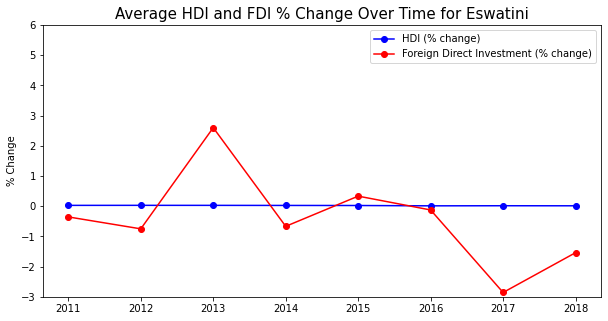

In [359]:
#plot HDI over time with FDI
#Eswatini
plt.figure(figsize= (10,5))
plt.plot(pchf_year, ehf_pch, marker ='o', linestyle='-', color = "b", label='HDI (% change)')
plt.plot(pchf_year, ef_pch, marker ='o', linestyle='-', color = "r", label='Foreign Direct Investment (% change)')
plt.ylabel("% Change", fontsize = 10)
plt.title("Average HDI and FDI % Change Over Time for Eswatini", fontsize= 15)
plt.ylim((-3,6))
plt.legend()

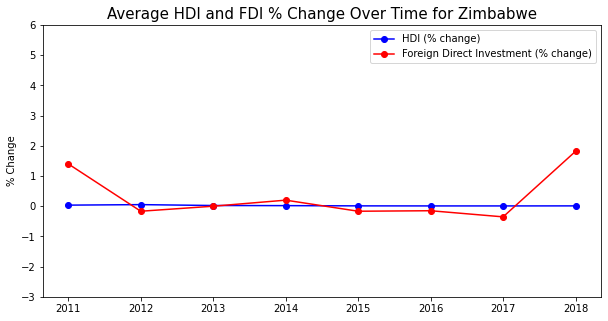

In [360]:
#Zimbabwe
plt.figure(figsize= (10,5))
plt.plot(pchf_year, zhf_pch, marker ='o', linestyle='-', color = "b", label='HDI (% change)')
plt.plot(pchf_year, zf_pch, marker ='o', linestyle='-', color = "r", label='Foreign Direct Investment (% change)')
plt.ylabel("% Change", fontsize = 10)
plt.title("Average HDI and FDI % Change Over Time for Zimbabwe", fontsize= 15)
plt.ylim((-3,6))
plt.legend()

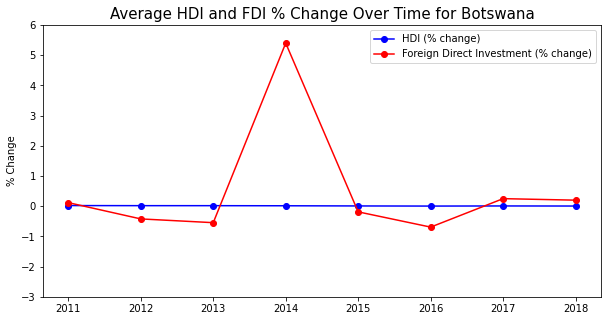

In [358]:
#Botswana
plt.figure(figsize= (10,5))
plt.plot(pchf_year, bhf_pch, marker ='o', linestyle='-', color = "b", label='HDI (% change)')
plt.plot(pchf_year, bf_pch, marker ='o', linestyle='-', color = "r", label='Foreign Direct Investment (% change)')
plt.ylabel("% Change", fontsize = 10)
plt.title("Average HDI and FDI % Change Over Time for Botswana", fontsize= 15)
plt.ylim((-3,6))
plt.legend()

In [361]:
#find correlations
#Eswatini
correlation, p_value = pearsonr(ehf_pch, ef_pch)
print("Eswatini: FDI vs. HDI = ", correlation)

#Zimbabwe
correlation, p_value = pearsonr(zhf_pch, zf_pch)
print("Zimbabwe: FDI vs. HDI = ", correlation)

#Botswana
correlation, p_value = pearsonr(bhf_pch, bf_pch)
print("Botswana: FDI vs. HDI = ", correlation)


Eswatini: FDI vs. HDI =  0.5093578147192478
Zimbabwe: FDI vs. HDI =  0.03471126514706657
Botswana: FDI vs. HDI =  0.12733385713504144


# **Final Conclusion**
HDI is a very complicated measure to find a proxy for. Internally, the correlation of HDI increases and its own components varies even within a group of successful countries. Looking at an external value like foregin direct investment (which many might claim significantly influence HDI) shows it is always a case by case with each country. Sub-saharan Africa, although home to many of the world's fastest growing economies, is full of diverse economies and varying systems of growth. There is no clear cut path to HDI growth, and it is even difficult to find a good proxy.

